# **Exploratory Data Analysis of the Global Terrorism Database**
### 1. **Introduction**
This report presents a comprehensive Exploratory Data Analysis (EDA) of the Global Terrorism Database (GTD). The primary objective is to uncover and visualize key patterns, trends, and hotspots in global terrorism from 1970 to 2020.

### 2. **About the Dataset**
The Global Terrorism Database (GTD) is a comprehensive open-source database of terrorist incidents worldwide, maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START). Each record in the dataset represents a single terrorist event and contains detailed attributes, including:

- ***Year, Month:*** Temporal data indicating when the incident occurred.
- ***Country, Region:*** Geographical data specifying the location of the incident.
- ***Latitude, Longitude:*** Coordinates for precise location mapping.
- ***AttackType:*** Type of attack (e.g., Bombing/Explosion, Armed Assault).
- ***TargetType:*** Target of the attack (e.g., Civilians, Military).
- ***WeaponType:*** Weapon used (e.g., Explosives, Firearms).
- ***suicide:*** Binary indicator (1 for suicide attacks, 0 otherwise).
- ***GroupName:*** Terrorist group responsible (or "Unknown").

#
 This dataset is critical for understanding global terrorism trends, identifying hotspots, and informing counter-terrorism strategies.
#### **Purpose of EDA**
Exploratory Data Analysis (EDA) is the process of summarizing and visualizing data to uncover patterns, trends, and anomalies. For this dataset, EDA helps:
- Identify temporal trends in terrorism incidents.
- Highlight geographical hotspots (countries and regions).
- Analyze the distribution of attack types, targets, and responsible groups.
- Assess the prevalence of suicide attacks.
- Prepare the data for machine learning by identifying missing values and feature engineering opportunities.

EDA is essential before building machine learning models to ensure data quality and inform feature selection.


In [3]:
# --- 1. SETUP LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean and modern plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8) # Set default figure size
plt.rcParams['font.size'] = 12 # Set default font size


### **3. Data Preparation and Feature Engineering**
#
Before visualizing the data, we clean and preprocess it to ensure accuracy:
- **Data Cleaning**: Convert suicide to an integer (0/1), ensure Latitude and Longitude are numeric, and handle "Unknown" in GroupName by renaming it to "Unknown_Group" to treat it as a distinct category.
- **Missing Values**: Impute missing Latitude and Longitude with their medians to preserve geographical data.
- **Feature Engineering**: Create a Decade column from Year to analyze trends over larger time periods, which helps reveal long-term patterns (e.g., shifts in terrorism activity across decades).

This step ensures the data is ready for visualization and future machine learning tasks by addressing inconsistencies and adding meaningful features

In [4]:
# =============================================================================
# --- 2. LOAD AND INSPECT THE CLEANED DATA ---
# =============================================================================
print("--- Loading and verifying the cleaned dataset ---")

# Load the cleaned CSV file
df = pd.read_csv('globalterrorismdb_cleaned.csv')
print("Cleaned dataset loaded successfully.")

# Print the dimensions (rows, columns)
print(f"\nThe cleaned dataset has {df.shape[0]:,} rows and {df.shape[1]} columns.")

# Display the first 5 rows to see the format
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

# Display a concise summary to confirm data types and non-null counts
print("\nData types and non-null counts:")
df.info()

--- Loading and verifying the cleaned dataset ---
Cleaned dataset loaded successfully.

The cleaned dataset has 209,706 rows and 11 columns.

First 5 rows of the cleaned dataset:
   Year  Month             Country                       Region   Latitude  \
0  1970      7  Dominican Republic  Central America & Caribbean  18.456792   
1  1970      0              Mexico                North America  19.371887   
2  1970      1         Philippines               Southeast Asia  15.478598   
3  1970      1              Greece               Western Europe  37.997490   
4  1970      1               Japan                    East Asia  33.580412   

    Longitude                      AttackType                   TargetType  \
0  -69.951164                   Assassination  Private Citizens & Property   
1  -99.086624     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2  120.599741                   Assassination          Journalists & Media   
3   23.762728               Bombing/Expl

In [8]:
# =============================================================================
# --- 3. DATA PREPARATION & FEATURE ENGINEERING ---
# =============================================================================
print("\n--- Preparing Data for Analysis ---")
# Ensure data types are correct and handle minor inconsistencies
df['suicide'] = df['suicide'].astype(int)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['GroupName'] = df['GroupName'].replace('Unknown', 'Unknown_Group')

# Handle any remaining missing values in key columns
df['Latitude'].fillna(df['Latitude'].median(), inplace=True)
df['Longitude'].fillna(df['Longitude'].median(), inplace=True)

# Feature engineering: Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10
print("Data preparation and feature engineering complete.")


--- Preparing Data for Analysis ---
Data preparation and feature engineering complete.


C:\Users\Ayush Gupte\AppData\Local\Temp\ipykernel_17640\4147919800.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].median(), inplace=True)
C:\Users\Ayush Gupte\AppData\Local\Temp\ipykernel_17640\4147919800.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

### **4. Summary Statistics**
#
Summary statistics provide a quick overview of the dataset's numerical and categorical features:
- **Numerical Columns (Year, Month, Latitude, Longitude, suicide)**: Show central tendencies (mean, median) and ranges to understand the spread of incidents over time and geography.
- **Categorical Columns (Country, Region, AttackType, TargetType, WeaponType, GroupName)**: Display unique values and frequencies to identify dominant categories (e.g., most common countries or attack types).
- **Missing Values**: Check for any remaining null values to ensure data quality.
#
This step helps confirm the dataset's structure and identify any anomalies before visualization.

In [27]:
# =============================================================================
# --- 4. SUMMARY STATISTICS ---
# =============================================================================
print("\n--- Dataset Summary Statistics ---")
print(df.describe(include='all'))

print("\n--- Final Check for Missing Values ---")
missing_vals = df.isnull().sum()
print(missing_vals[missing_vals > 0])



--- Dataset Summary Statistics ---
                 Year          Month Country                      Region  \
count   209706.000000  209706.000000  209706                      209706   
unique            NaN            NaN     204                          12   
top               NaN            NaN    Iraq  Middle East & North Africa   
freq              NaN            NaN   27521                       58252   
mean      2004.800993       6.455285     NaN                         NaN   
std         13.519321       3.387098     NaN                         NaN   
min       1970.000000       0.000000     NaN                         NaN   
25%       1992.000000       4.000000     NaN                         NaN   
50%       2012.000000       6.000000     NaN                         NaN   
75%       2015.000000       9.000000     NaN                         NaN   
max       2020.000000      12.000000     NaN                         NaN   

             Latitude      Longitude         Attack

### **5. Visualization and Insights**
A series of visualizations were created to explore the data from different perspectives.

**a. Terrorism Incidents by Year (Line Plot)**
- ***Justification:*** A line plot is the ideal choice for visualizing trends over a continuous time interval, clearly showing peaks, troughs, and long-term patterns.

- ***Key Insights:***

   - The data reveals a dramatic spike in terrorist incidents starting after 2001, reaching an unprecedented peak around 2014.

   - Following this peak, there has been a notable decline in the number of annual incidents, though levels remain significantly higher than in the 20th century.


--- Generating Visualizations ---
Generating plot 1: Incidents by Year...


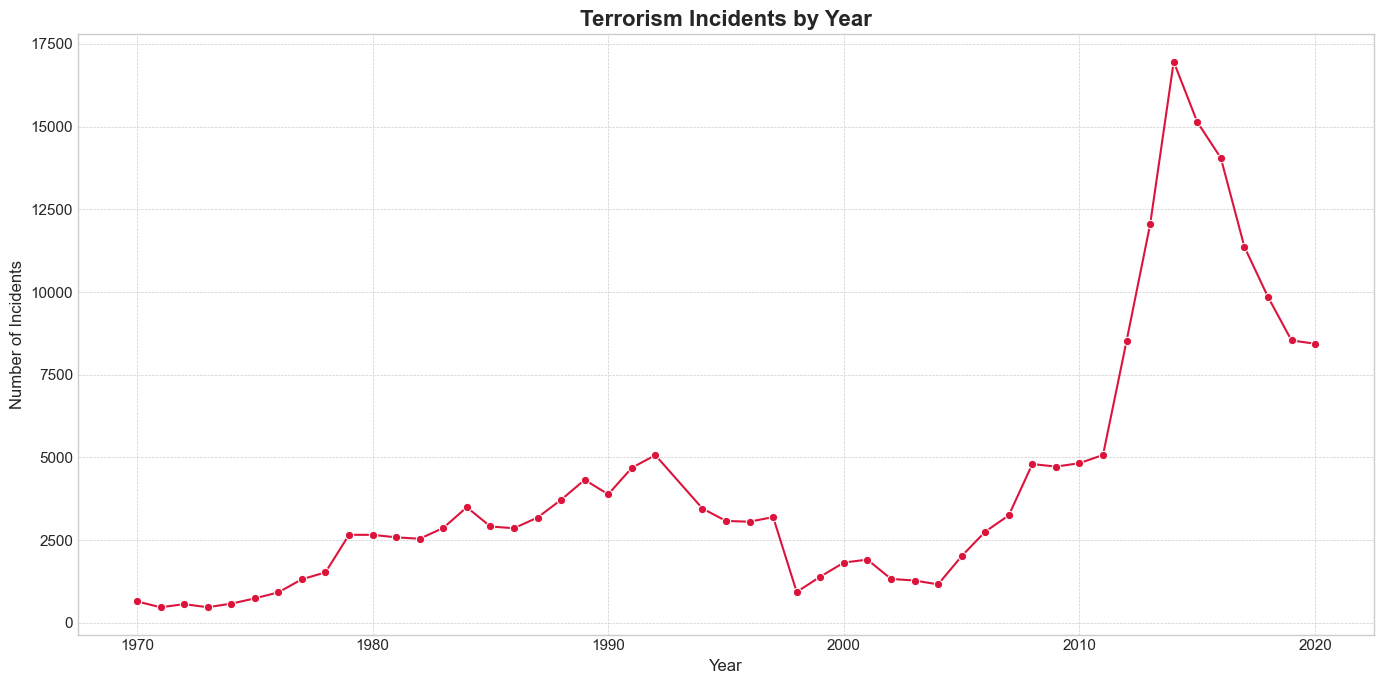

In [35]:
# =============================================================================
# --- 5. EXPLORATORY DATA VISUALIZATION ---
# =============================================================================
print("\n--- Generating Visualizations ---")

# 1. Line Plot: Incidents per Year
print("Generating plot 1: Incidents by Year...")
yearly_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='crimson')
plt.title('Terrorism Incidents by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**b. Top 10 Countries by Incidents (Bar Plot)**
- ***Justification:*** A horizontal bar chart is excellent for comparing the magnitude of different categories, making it easy to rank countries by the number of attacks.

- ***Key Insights:***

   - Iraq stands out as the country most affected by terrorism by a significant margin.

   - The top countries most affected—Iraq, Pakistan, Afghanistan, and India—are all located in the Middle East and South Asia, highlighting these regions as the primary epicenters of modern terrorist activity.

Generating plot 2: Top 10 Countries...


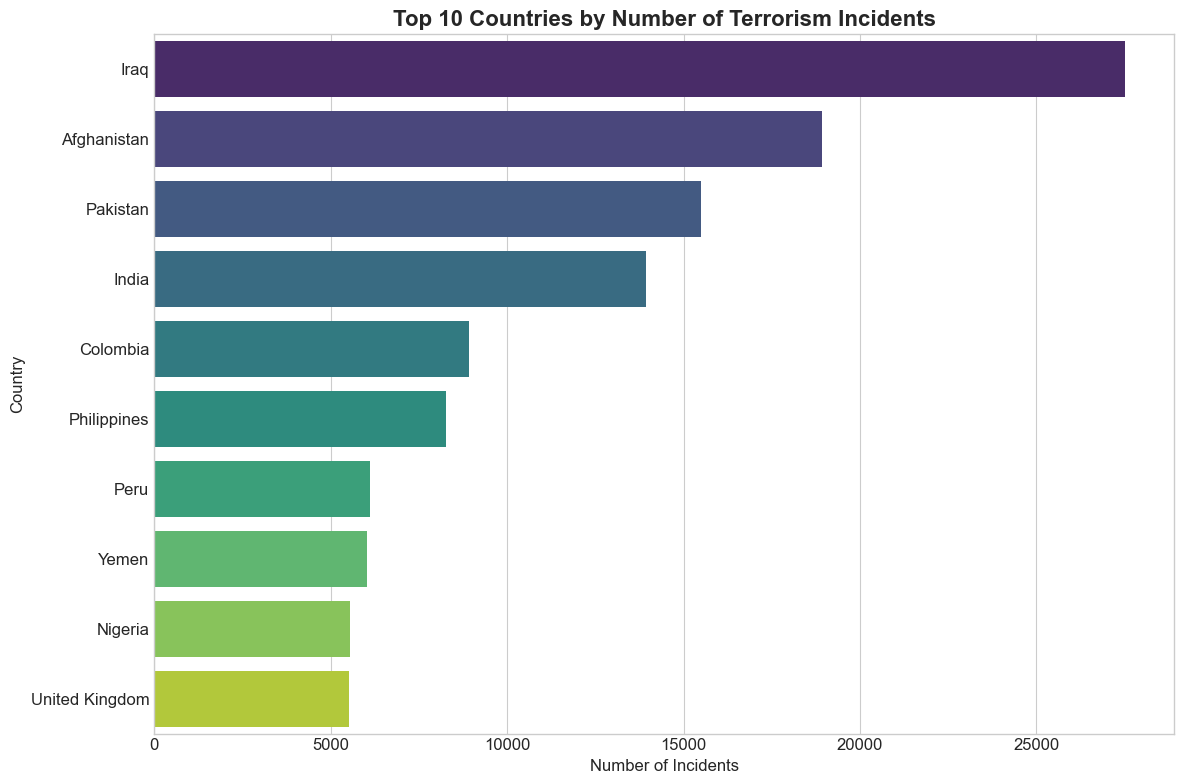

In [5]:
# 2. Bar Plot: Top 10 Countries by Incidents
print("Generating plot 2: Top 10 Countries...")
plt.figure(figsize=(12, 8))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries by Number of Terrorism Incidents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

**c. Distribution of Attack Types (Bar Plot)**
- ***Justification:*** A bar chart effectively compares the frequencies of different attack methods, clearly showing which tactics are most common.

- ***Key Insights:***

  - Bombings and Explosions are, by a large margin, the most prevalent terrorist tactic.

  - Armed Assaults are the second most frequent method but occur at less than half the rate of bombings.

Generating plot 3: Attack Type Distribution...


C:\Users\Ayush Gupte\AppData\Local\Temp\ipykernel_15616\1465794879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='rocket')


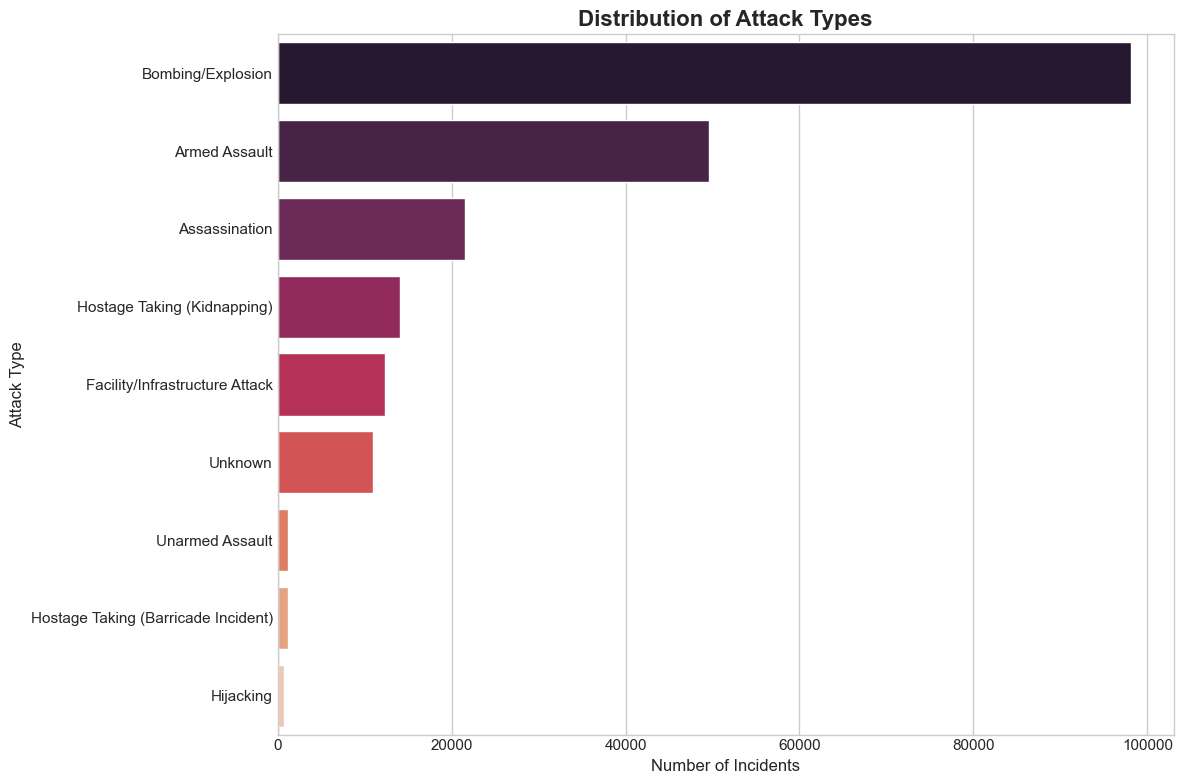

In [45]:
# 3. Bar Plot: Attack Type Distribution
print("Generating plot 3: Attack Type Distribution...")
plt.figure(figsize=(12, 8))
attack_type_counts = df['AttackType'].value_counts()
sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='rocket')
plt.title('Distribution of Attack Types', fontsize=16, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.tight_layout()
plt.show()

**d. Top 10 Deadliest Groups by Casualties (Bar Plot)**
- ***Justification:*** This bar plot ranks groups not by frequency of attacks, but by their total human impact (Casualties). This gives a different and crucial perspective on which groups have been the most destructive.

- ***Key Insights:***

  - The Taliban and the Islamic State of Iraq and the Levant (ISIL) are responsible for an exceptionally high number of casualties, far surpassing other groups.

  - This highlights that the "deadliest" groups are not always the same as the most "active" groups in terms of incident count.

Generating plot 4: Top 10 Terrorist Groups...


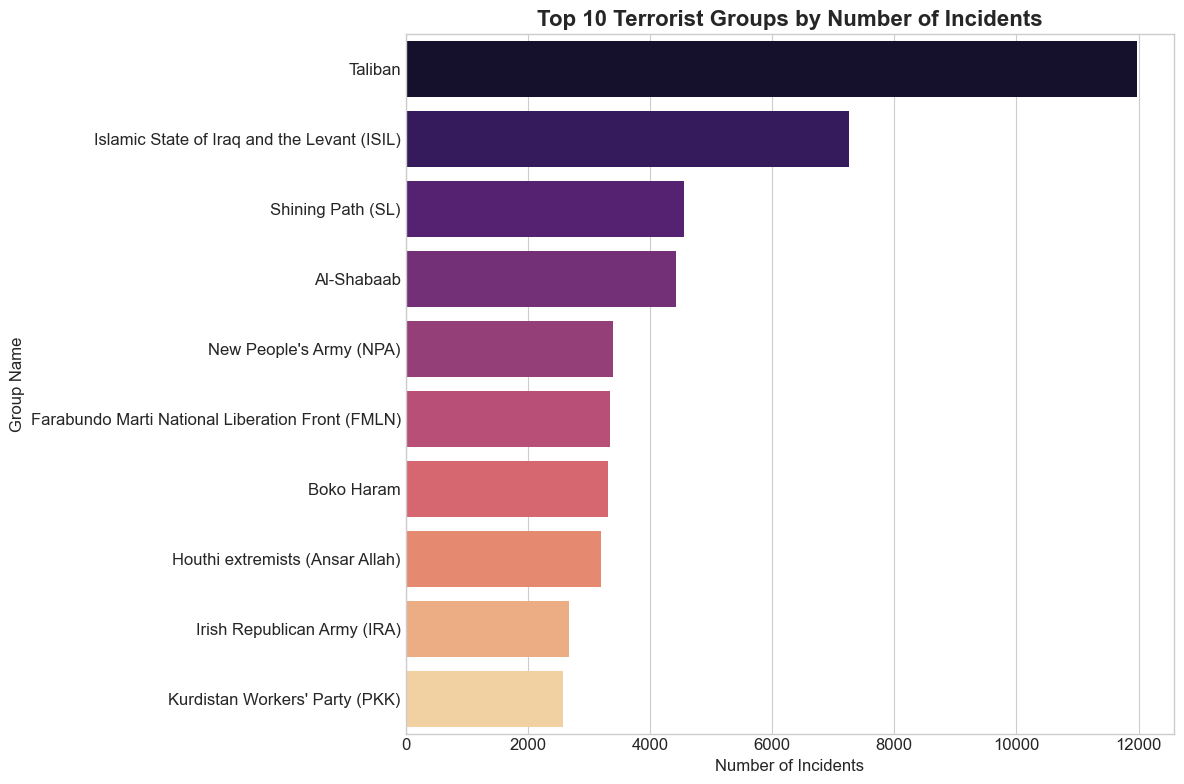

In [ ]:
# 4. Bar Plot: Top 10 Terrorist Groups
print("Generating plot 4: Top 10 Terrorist Groups...")
# Increased figure height to accommodate more bars
plt.figure(figsize=(12, 8)) 
group_counts = df[df['GroupName'] != 'Unknown_Group']['GroupName'].value_counts().head(10)
sns.barplot(y=group_counts.index, x=group_counts.values, hue=group_counts.index, palette='magma', legend=False)
plt.title('Top 10 Terrorist Groups by Number of Incidents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Group Name', fontsize=12)
plt.tight_layout()
plt.show()

**e. Heatmap of Attack Types vs. Region**
- ***Justification:*** A heatmap is perfect for visualizing the relationship and frequency between two categorical variables (Region and AttackType). Color intensity makes it easy to spot "hotspots" (frequent combinations) and "coldspots" (rare combinations).

- ***Key Insights:***

  - The dark blue cells clearly show that Bombing/Explosion is the dominant tactic in the most active regions: the Middle East & North Africa and South Asia.

  - While Armed Assault is a common secondary tactic globally, the raw numbers are exceptionally high in the same two hotspot regions.

  - Specialized tactics like Hijacking are very rare across all regions, as indicated by the very light-colored cells.

Generating plot 5: Heatmap of Attack Types vs. Region...


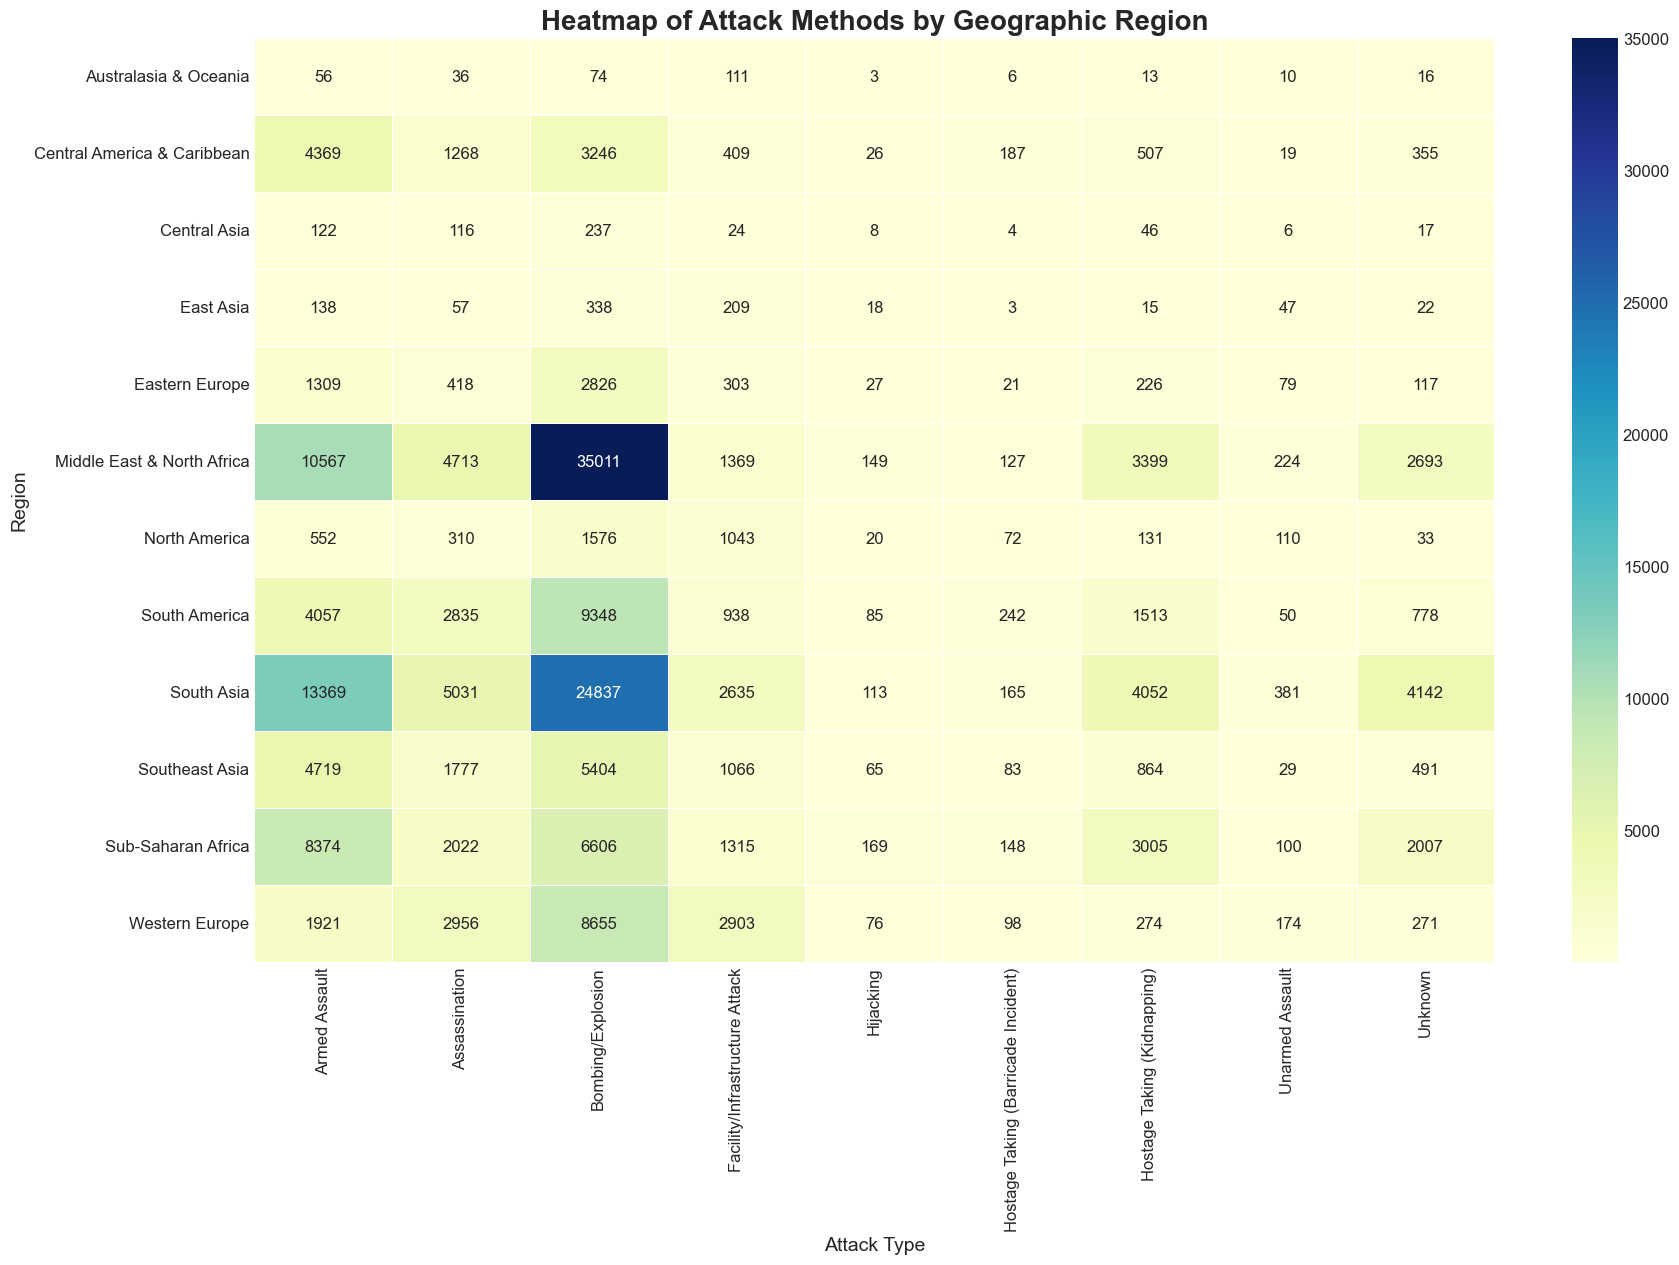

In [6]:
# 5. Heatmap of Attack Types vs. Region 🔥
print("Generating plot 5: Heatmap of Attack Types vs. Region...")
# Create a crosstab to count combinations of Attack Type and Region
attack_region_ct = pd.crosstab(df['Region'], df['AttackType'])
plt.figure(figsize=(20, 12))
sns.heatmap(attack_region_ct, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Attack Methods by Geographic Region', fontsize=20, fontweight='bold')
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.show()

**f. Incidents by Region Over Decades (Stacked Bar Plot)**
- ***Justification:*** A stacked bar chart is used to show how the composition of a total changes over time. It allows us to see both the total number of attacks per decade and which regions contributed to that total.

- ***Key Insights:***

  - This plot clearly illustrates a major geographic shift in terrorism. In the 1970s and 1980s, Latin America and Western Europe were significant hotspots.

  - In the 2000s and especially the 2010s, activity became overwhelmingly concentrated in the Middle East & North Africa and South Asia.

Generating plot 6: Incidents by Region Over Decades...


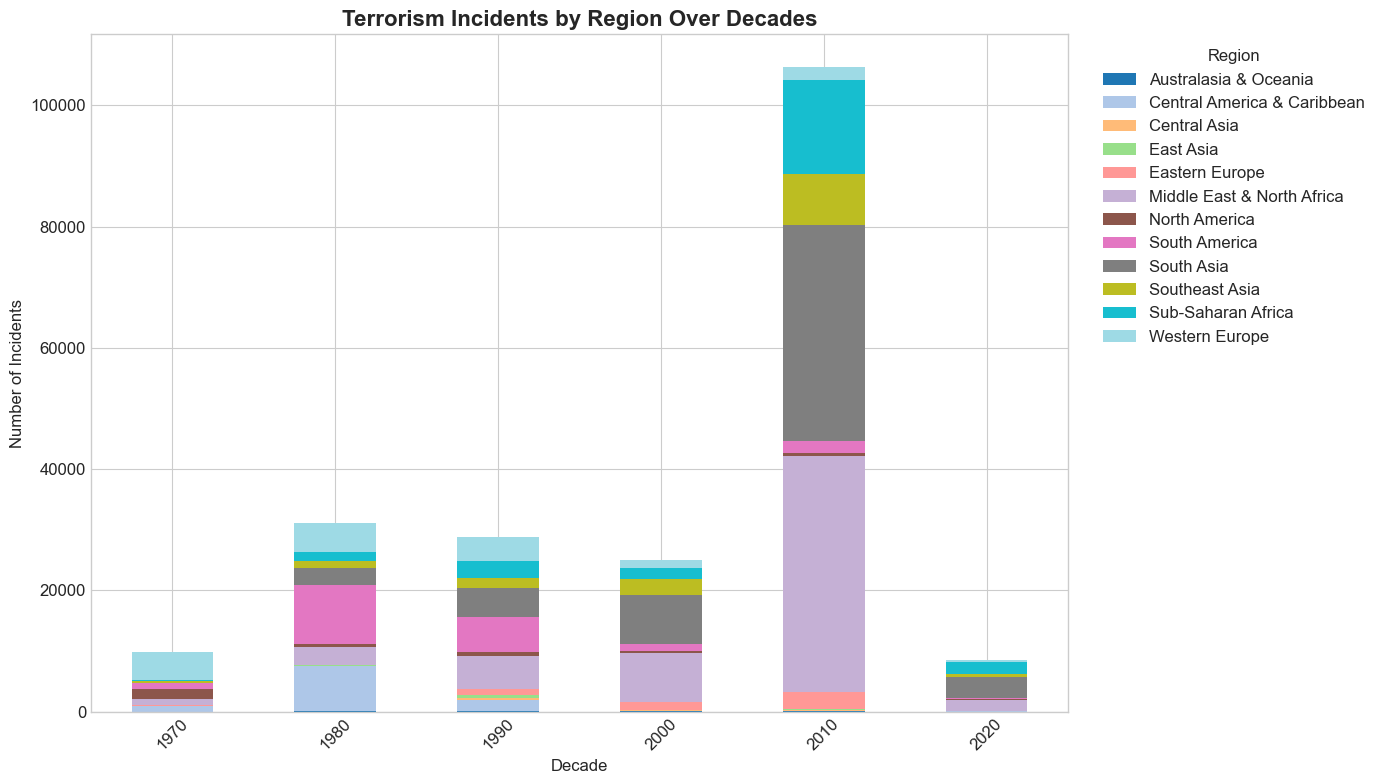

In [9]:
# 6. Stacked Bar Plot: Incidents by Region Over Decades
print("Generating plot 6: Incidents by Region Over Decades...")
decade_region = pd.crosstab(df['Decade'], df['Region'])
fig, ax = plt.subplots(figsize=(14, 8))
decade_region.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('Terrorism Incidents by Region Over Decades', fontsize=16, fontweight='bold')
ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Number of Incidents', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


**g. Proportion of Suicide Attacks (Donut Plot)**
- ***Justification:*** A donut chart is a visually appealing way to show the proportional breakdown of a binary category.

- ***Key Insights:***

  - Despite their high media profile, suicide attacks represent a small fraction of all incidents, accounting for only 3.5% of the total in the dataset.

Generating plot 6: Suicide vs. Non-Suicide Attacks...


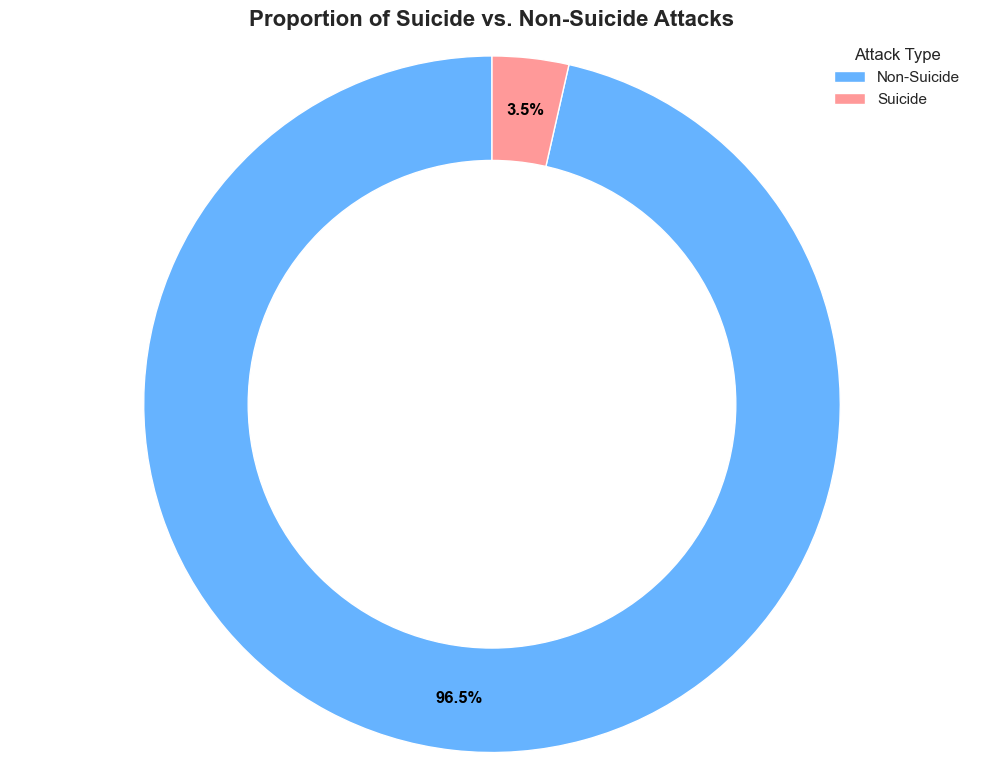

In [ ]:
# 7. Proportion of Suicide vs Non-Suicide
print("Generating plot 6: Suicide vs. Non-Suicide Attacks...")
suicide_counts = df['suicide'].value_counts()  
labels = ['Non-Suicide', 'Suicide']
plt.figure(figsize=(8, 8))
plt.pie(suicide_counts, autopct='%.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'], wedgeprops={'edgecolor': 'white', 'width': 0.4})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='white'))  # Create donut hole
plt.title('Proportion of Suicide vs. Non-Suicide Attacks', fontsize=16, fontweight='bold')
plt.legend(labels, title='Attack Type', loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

**h. Correlation Matrix of Numerical Features (Heatmap)**
- ***Justification:*** A heatmap is the standard and most effective way to visualize a correlation matrix, using color to represent the strength and direction of relationships between numerical variables.

- ***Key Insights:***

  - There is a moderate positive correlation between Killed and Wounded, which is expected.

  - Most other features show very weak correlations, indicating that they represent largely independent dimensions of the data.

Generating plot 8: Correlation Matrix...


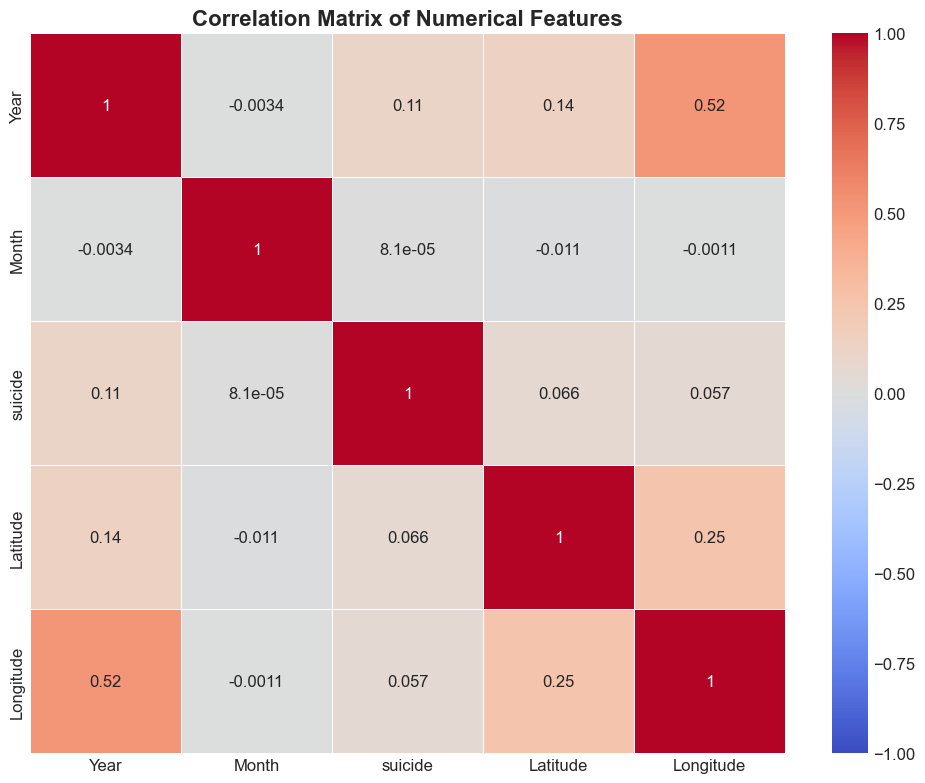

In [10]:
# 8. Heatmap: Correlation Matrix for Numerical Features
print("Generating plot 8: Correlation Matrix...")
plt.figure(figsize=(10, 8))
numeric_cols = ['Year', 'Month', 'suicide', 'Latitude', 'Longitude']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**i. Annual Activity of Top Terrorist Groups (Heatmap)**
- ***Justification:*** This heatmap effectively visualizes time-series data for multiple categories (groups) simultaneously, making it much cleaner than an overlapping line chart. Color intensity reveals periods of high and low activity for each group.

- ***Key Insights:***

  - It powerfully illustrates different eras of terrorism. Groups like the IRA and Shining Path were highly active in the late 20th century.

  - Groups like ISIL, the Taliban, and Boko Haram dominate the post-2010 landscape, showing intense periods of activity in recent years.

Generating improved plot 9: Heatmap of Top Group Activity...


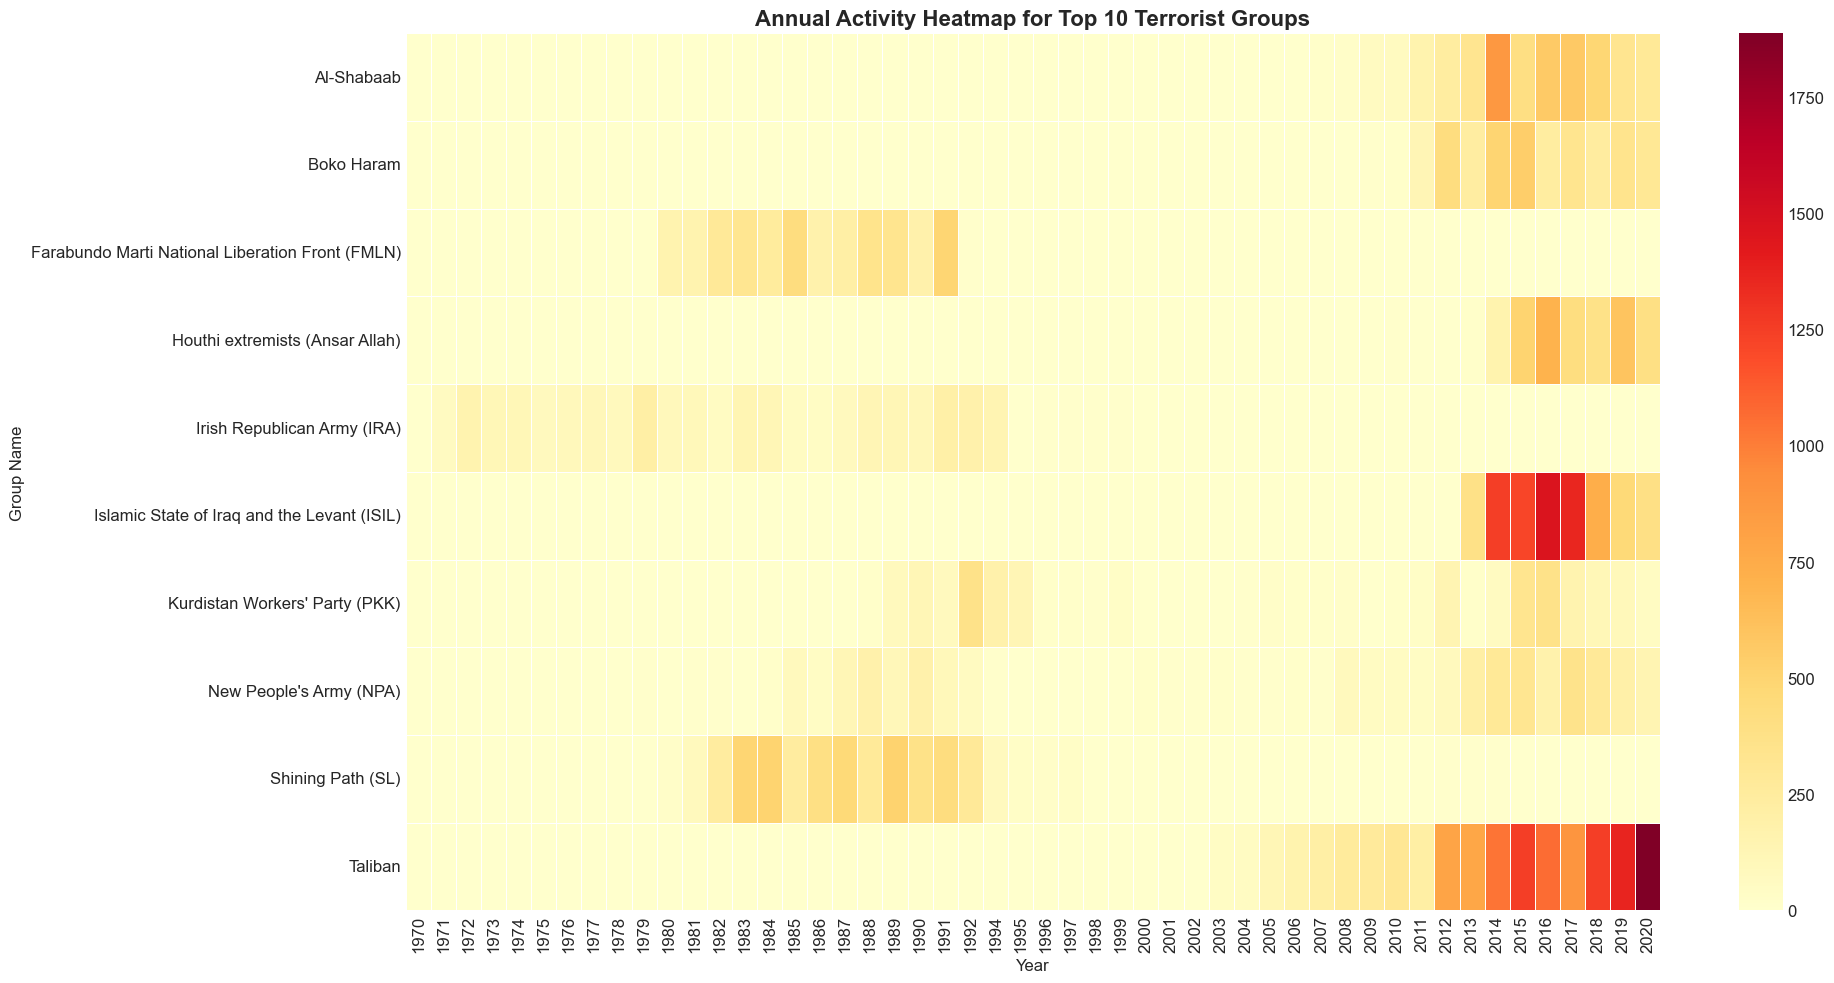

In [21]:
# 9. Heatmap: Top Group Activity by Year (Improved with Linear Scale)
print("Generating improved plot 9: Heatmap of Top Group Activity...")

# Prepare the data (same as before)
top_10_groups = df[df['GroupName'] != 'Unknown_Group']['GroupName'].value_counts().index[:10]
df_top_10 = df[df['GroupName'].isin(top_10_groups)]
group_activity_year = df_top_10.groupby(['Year', 'GroupName']).size().unstack().fillna(0)

# Create the plot
plt.figure(figsize=(20, 10))

# --- Use a vibrant colormap and grid lines but remove the LogNorm ---
sns.heatmap(
    group_activity_year.T,      # .T transposes the data for better viewing
    cmap='YlOrRd',              # Use a more vibrant colormap
    linewidths=0.5,             # Add thin lines between cells
    annot=False                 # Keep annotations off for clarity
)

# Set titles and labels
plt.title('Annual Activity Heatmap for Top 10 Terrorist Groups', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Group Name', fontsize=12)
plt.tight_layout()
plt.show()

**j. Interactive Map of Incident Locations (Optimized)**
- ***Justification:*** An interactive scatter map allows for a dynamic exploration of the geographic distribution of attacks. To ensure performance, this map plots a random sample of incidents. This technique preserves the overall distribution and density patterns while allowing for a smooth, responsive user experience.

- ***Key Insights:***

  - The map visually confirms the extreme concentration of attacks in hotspots like Iraq, Afghanistan, and Pakistan.

  - By zooming in, users can identify smaller, localized clusters of activity in other regions, such as in parts of Africa and Southeast Asia.

  - The color-coding by attack type allows for the identification of geographic patterns in tactics, such as the prevalence of bombings in urban centers.

In [8]:
# 9. Interactive Map of Incident Locations (Optimized for Performance)
# =============================================================================
# --- Add this import statement at the top of your script with the others ---
import plotly.express as px

print("Generating plot 9: Interactive Incident Locations Map...")

# --- OPTIMIZATION: Take a random sample of the data to ensure performance ---
# Plotting all 200,000+ points can be very slow. A sample still shows the distribution.
sample_size = 30000
df_sample = df.sample(n=sample_size, random_state=42) # random_state for reproducibility

# --- Create the Interactive Map using the sampled data ---
fig = px.scatter_geo(
    df_sample,
    lat='Latitude',
    lon='Longitude',
    color='AttackType',          # Color bubbles by the type of attack
    hover_name='Country',        # Show country name on hover
    hover_data=['Region', 'Year', 'AttackType'], # Define extra data to show on hover
    projection='natural earth',  # A popular map projection
    title=f'Global Terrorism Incidents',
)

# --- Customize the Map's Appearance ---
fig.update_layout(
    title_font_size=20,
    title_font=dict(weight='bold'),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        landcolor='rgb(243, 243, 243)',     # Light grey land color
        countrycolor='rgb(204, 204, 204)'  # Grey country borders
    ),
    legend_title_text='<b>Attack Type</b>' # Bold the legend title
)

# --- Display the Map ---
# This will now render a fast and responsive interactive map.
fig.show()

Generating plot 9: Interactive Incident Locations Map...
